# Bank Customer Churn

In [1]:
!pip install pandas openpyxl
import pandas as pd

In [2]:
df1= pd.read_csv("Bank_Churn.csv")
df3= pd.read_csv("Bank_Churn_Data_Dictionary.csv")
df2= pd.read_excel("Bank_Churn_Messy.xlsx")

Looking through the dataset:

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [5]:
df3.head()

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)


In [6]:
df2


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


We are provided with a messy dataset and the cleaned one. So, I'll clean up the messy one and then compare it to the cleaned version.

In [7]:
df2.info()
df2.describe(include="all")
df2.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [8]:
df2[df2['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
28,15728693,NaN,574,Germany,Female,NaN,3,-€999999
121,15580203,NaN,674,Spain,Male,NaN,6,-€999999
9389,15756954,NaN,538,France,Female,NaN,2,-€999999


To handle the missing values:
1. We replace surname with 'Unknown'
2. We use the geographic median value for the 'Age' column
3. We replace the place holder with null then use the geographic median in the 'EstimatedSalary' column

In [9]:
df2['Surname'] = df2['Surname'].fillna('Unknown')

In [10]:
df2['Age'] = df2.groupby('Geography')['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [11]:
df2['EstimatedSalary'] = df2['EstimatedSalary'].replace("-€999999", None)
df2['EstimatedSalary'] = df2['EstimatedSalary'].replace('[€,-]', '', regex=True)
df2['EstimatedSalary'] = pd.to_numeric(df2['EstimatedSalary'], errors='coerce')
df2['EstimatedSalary'] = df2.groupby('Geography')['EstimatedSalary'].transform(
    lambda x: x.fillna(x.median())
)

In [12]:
df2['Geography'].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

In [13]:
df2['Geography']= df2['Geography'].replace("FRA", "French")

In [14]:
df2['Geography']= df2['Geography'].replace("French", "France")

In [15]:
df2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58
2,15619304,Onio,502,France,Female,42.0,8,113931.57
3,15701354,Boni,699,France,Female,39.0,1,93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,France,Male,35.0,10,101699.77
9997,15584532,Liu,709,France,Female,36.0,7,42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52
9999,15628319,Walker,792,France,Female,28.0,4,38190.78


In [17]:
df2['CustomerId'].duplicated().sum()

1

In [18]:
df2 = df2.drop_duplicates()


In [19]:
df2['CustomerId'].duplicated().sum()


0

In [20]:
df2.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
EstimatedSalary    float64
dtype: object

In [21]:
df2['Age']= df2['Age'].astype('int64')
df2['CustomerId']= df2['CustomerId'].astype('object')
df2['Gender'] = df2['Gender'].astype('category')
df2['Geography'] = df2['Geography'].astype('category')
df2.dtypes


C:\Users\Iamphenomenal\AppData\Local\Temp\ipykernel_26588\2115174371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age']= df2['Age'].astype('int64')
C:\Users\Iamphenomenal\AppData\Local\Temp\ipykernel_26588\2115174371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CustomerId']= df2['CustomerId'].astype('object')
C:\Users\Iamphenomenal\AppData\Local\Temp\ipykernel_26588\2115174371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

CustomerId           object
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
EstimatedSalary     float64
dtype: object

In [22]:
df2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,101348.88
1,15647311,Hill,608,Spain,Female,41,1,112542.58
2,15619304,Onio,502,France,Female,42,8,113931.57
3,15701354,Boni,699,France,Female,39,1,93826.63
4,15737888,Mitchell,850,Spain,Female,43,2,79084.10
...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,96270.64
9996,15569892,Johnstone,516,France,Male,35,10,101699.77
9997,15584532,Liu,709,France,Female,36,7,42085.58
9998,15682355,Sabbatini,772,Germany,Male,42,3,92888.52


In [23]:
# export file
df2.to_csv("Bank_Churn_Clean.csv", index=False)

The messy dataset lacked key target and financial columns (e.g., Balance, Exited). After cleaning it, I switched to the full clean dataset for churn modeling

In [24]:
df1

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
# Distribution of churn (Exited column)
df1['Exited'].value_counts(normalize=True)


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [26]:
# Summary statistics for numeric features
df1.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


I noticed an unusually low minimum salary of 11.58. This may represent data entry issues or outlier customers. Since most salaries are much higher, this value could skew models and requires either transformation (e.g., log scale) or careful handling.

In [27]:
# Find customers with very low salary
df1[df1['EstimatedSalary'] < 1000].count()


CustomerId         59
Surname            59
CreditScore        59
Geography          59
Gender             59
Age                59
Tenure             59
Balance            59
NumOfProducts      59
HasCrCard          59
IsActiveMember     59
EstimatedSalary    59
Exited             59
dtype: int64

<Axes: >

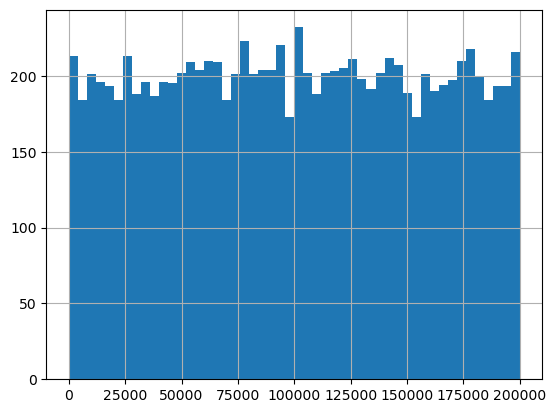

In [28]:
df1['EstimatedSalary'].hist(bins=50)


EstimatedSalary is uniformly distributed (synthetic data), so I decided to keep all values, including the very low salaries, as they represent the dataset’s design.

In [29]:
# Compare numeric averages for churned vs non-churned
df1.groupby('Exited')[['Age','Balance','CreditScore','EstimatedSalary','Tenure']].mean()


,Age,Balance,CreditScore,EstimatedSalary,Tenure
Exited,,,,,
0,37.408389,72745.296779,651.853196,99738.391772,5.033279
1,44.837997,91108.539337,645.351497,101465.677531,4.932744


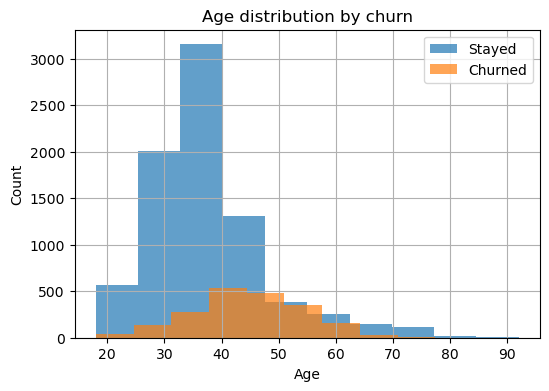

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df1[df1['Exited']==0]['Age'].hist(alpha=0.7, label='Stayed')
df1[df1['Exited']==1]['Age'].hist(alpha=0.7, label='Churned')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by churn')
plt.legend()
plt.show()


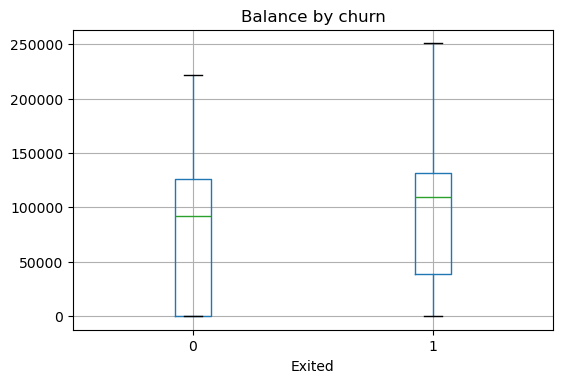

In [31]:
df1.boxplot(column='Balance', by='Exited', figsize=(6,4))
plt.title('Balance by churn')
plt.suptitle('')
plt.show()


Age and Balance are strong predictors of churn.

CreditScore has some effect (lower scores churn more).

Salary and Tenure do not explain churn well here.


Older customers and those with higher balances are more likely to churn, suggesting that valuable customers may be leaving the bank for competitors.

In [32]:
# Churn rates by Geography
geo_churn = df1.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
geo_churn


Geography
Germany    0.324432
Spain      0.166734
France     0.161548
Name: Exited, dtype: float64

In [33]:
# Churn rates by Gender
gender_churn = df1.groupby('Gender')['Exited'].mean()
gender_churn

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [34]:
# Churn rates by HasCrCard
card_churn = df1.groupby('HasCrCard')['Exited'].mean()
card_churn


HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64

In [35]:
# Churn rates by Active Membership
active_churn = df1.groupby('IsActiveMember')['Exited'].mean()
active_churn

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

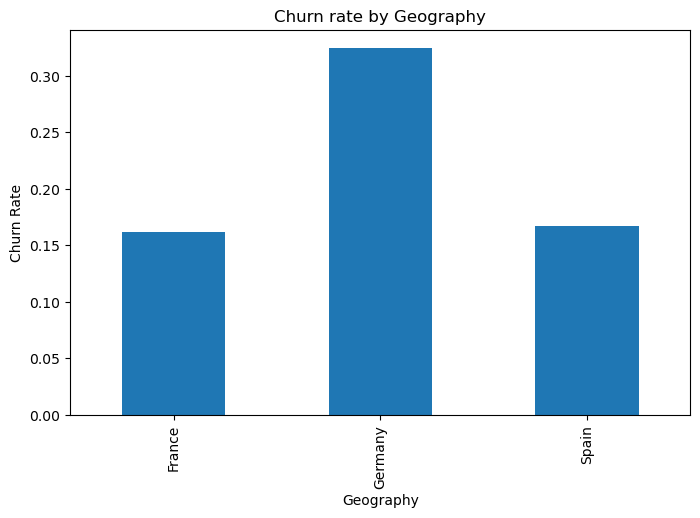

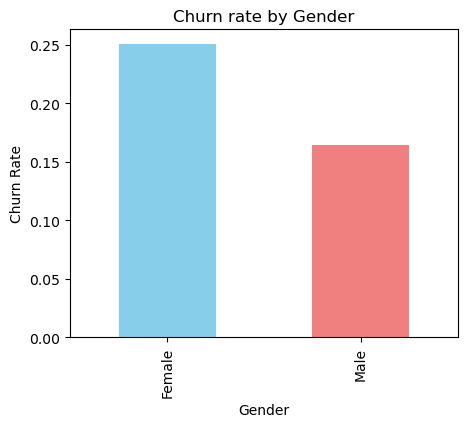

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df1.groupby('Geography')['Exited'].mean().plot(kind='bar')
plt.ylabel("Churn Rate")
plt.title("Churn rate by Geography")
plt.show()

plt.figure(figsize=(5,4))
df1.groupby('Gender')['Exited'].mean().plot(kind='bar', color=['skyblue','lightcoral'])
plt.ylabel("Churn Rate")
plt.title("Churn rate by Gender")
plt.show()


Churn is strongly linked to customer geography, gender, and account activity. In particular, German customers, inactive members, and female customers show higher churn rates, suggesting the bank should focus retention campaigns on these groups.

# Modeling prep

In [37]:
# Features (X) = all columns except target and IDs
X = df1.drop(columns=['Exited','CustomerId','Surname'], errors='ignore')

# Target (y) = churn status
y = df1['Exited']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (10000, 10)
Shape of y: (10000,)


In [38]:
from sklearn.model_selection import train_test_split

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (7000, 10)
Test set: (3000, 10)


In [39]:
# Numeric features
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical features: ['Geography', 'Gender']


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Scale numeric features, encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


# Logistic Regression (Baseline Model)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Logistic Regression pipeline
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [42]:
# training the model
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [43]:
y_pred = pipe_lr.predict(X_test)          # 0 or 1 (churn or not)
y_proba = pipe_lr.predict_proba(X_test)[:,1]  # churn probability


In [44]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000

ROC AUC: 0.7880993012847346
Confusion Matrix:
 [[2319   70]
 [ 491  120]]


Logistic Regression is okay as a baseline (AUC ~0.79).

But it misses most churners (recall only 20%).

This is because of the class imbalance (80% stay, 20% churn).

We’ll need a stronger model (like Random Forest) and/or adjust thresholds to catch more churners.

# Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Random Forest pipeline
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,    # number of trees
        random_state=42,     # reproducibility
        class_weight='balanced'  # helps with class imbalance
    ))
])


In [46]:
pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [47]:
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]


In [48]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.79      0.45      0.57       611

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.86      0.86      0.85      3000

ROC AUC: 0.86873689352248
Confusion Matrix:
 [[2314   75]
 [ 337  274]]


2314 Correctly predicted stays.

274 Correctly predicted churners.

337 Missed churners.

75 False alarms (predicted churn, actually stayed).

Still missing some churners, but far better than Logistic Regression.

In [49]:
# Extract feature importance
# Need to rebuild column names after preprocessing
import numpy as np

preprocessor_fit = preprocessor.fit(X)
ohe = preprocessor_fit.named_transformers_['cat']
ohe_cols = list(ohe.get_feature_names_out(['Geography','Gender']))
feature_names = list(X.select_dtypes(include=['int64','float64']).columns) + ohe_cols

importances = pipe_rf.named_steps['classifier'].feature_importances_
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Top 10 important features:")
for f, imp in feat_imp[:10]:
    print(f"{f}: {imp:.3f}")


Top 10 important features:
Age: 0.242
Balance: 0.146
EstimatedSalary: 0.141
CreditScore: 0.137
NumOfProducts: 0.129
Tenure: 0.080
IsActiveMember: 0.036
Geography_Germany: 0.033
Gender_Male: 0.021
HasCrCard: 0.018


# Feature Importance Visualization

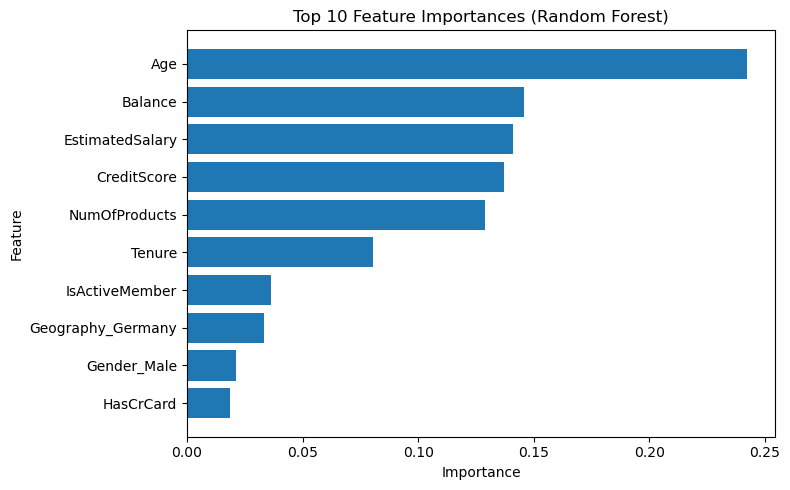

In [50]:


# Convert feature importance to DataFrame for easy plotting

feat_imp_df = pd.DataFrame(feat_imp, columns=['Feature','Importance'])

# Keep top 10
top10 = feat_imp_df.head(10)

# Plot
plt.figure(figsize=(8,5))
plt.barh(top10['Feature'][::-1], top10['Importance'][::-1])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Model Comparison

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Logistic Regression metrics
metrics_lr = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

# Random Forest metrics
metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_proba_rf)
}

# Combine into one DataFrame
comparison = pd.DataFrame([metrics_lr, metrics_rf])
print(comparison)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.813000   0.631579  0.196399  0.299625  0.788099
1        Random Forest  0.862667   0.785100  0.448445  0.570833  0.868737


Random Forest significantly improved churn detection (Recall up from 20% to 45%).

AUC improved from ~0.79 to ~0.87.

Feature importance shows Age, Balance, Salary, CreditScore, and NumOfProducts are the top churn drivers.

Geography_Germany confirms what we saw in categorical EDA.

# Customer Segmentation

In [52]:
# Use the same preprocessing (scale numeric + encode categorical)
X_transformed = preprocessor.fit_transform(X)
print("Shape of transformed data:", X_transformed.shape)


Shape of transformed data: (10000, 11)


In [53]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization, 5 for clustering
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_transformed)

print("Explained variance by PCA components:", pca.explained_variance_ratio_)


Explained variance by PCA components: [0.15409983 0.12760493 0.1177329  0.1164303  0.11593102]


In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}
for k in range(2, 7):  # test 2 to 6 clusters
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    sil_scores[k] = silhouette_score(X_pca, labels)

print("Silhouette scores:", sil_scores)
best_k = max(sil_scores, key=sil_scores.get)
print("Best k:", best_k)


Silhouette scores: {2: 0.1799501781204566, 3: 0.156820286613175, 4: 0.15753467605864138, 5: 0.15732340036157738, 6: 0.15509807630540723}
Best k: 2


In [55]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Add clusters back to original df
df1['cluster'] = cluster_labels


In [56]:
# Group by cluster and compute averages
cluster_profile = df1.groupby('cluster').agg({
    'Age':'mean',
    'Balance':'mean',
    'EstimatedSalary':'mean',
    'CreditScore':'mean',
    'NumOfProducts':'mean',
    'IsActiveMember':'mean',
    'Exited':'mean'
})

print(cluster_profile)


               Age        Balance  EstimatedSalary  CreditScore  \
cluster                                                           
0        37.930390   24043.128504     99408.926462   650.648557   
1        39.805219  123216.276734    100697.340643   650.422088   

         NumOfProducts  IsActiveMember    Exited  
cluster                                           
0             1.898557        0.521010  0.163413  
1             1.201967        0.509834  0.239599  


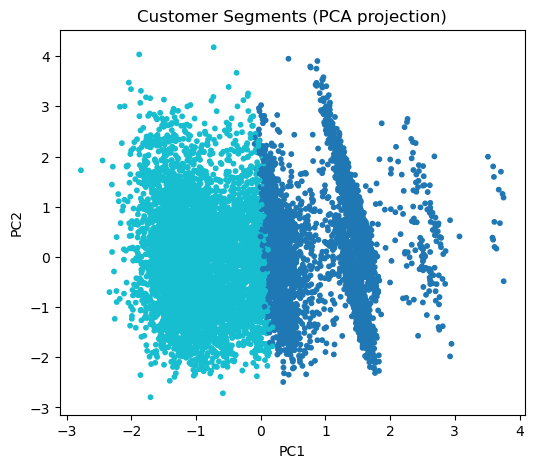

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='tab10', s=10)
plt.title('Customer Segments (PCA projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Using KMeans clustering (k=2), customers naturally split into two segments. PCA visualization shows clear separation between groups.

Cluster 0: younger, lower balances, multi-product users, lower churn (16%).
Cluster 1: older, higher balances, fewer products, higher churn (24%).
This insight suggests targeted retention strategies for Cluster 1 and cross-sell opportunities in Cluster 0.